In [1]:
import pandas as pd
import altair as alt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
budget = pd.read_csv("https://github.com/chris1610/pbpython/raw/master/data/mn-budget-detail-2014.csv")
budget.head()

,category,detail,amount
0,UNIVERSITY OF MINNESOTA,Higher Education Asset Preservation (HEAPR) 1,42500000
1,UNIVERSITY OF MINNESOTA,Minneapolis; Tate Laboratory Renovation,56700000
2,UNIVERSITY OF MINNESOTA,Crookston; Wellness Center,10000000
3,UNIVERSITY OF MINNESOTA,Research Laboratories,8667000
4,UNIVERSITY OF MINNESOTA,Duluth; Chemical Sciences and Advanced Materia...,1500000


In [10]:
budgetTop10 = budget.sort_values(by="amount", ascending=False)[:10]
budgetTop10

,category,detail,amount
46,ADMINISTRATION,Capitol Renovation and Restoration Continued,126300000
1,UNIVERSITY OF MINNESOTA,Minneapolis; Tate Laboratory Renovation,56700000
78,HUMAN SERVICES,Minnesota Security Hospital - St. Peter,56317000
0,UNIVERSITY OF MINNESOTA,Higher Education Asset Preservation (HEAPR) 1,42500000
5,MINNESOTA STATE COLLEGES AND UNIVERSITIES,Higher Education Asset Preservation (HEAPR) 2,42500000
6,MINNESOTA STATE COLLEGES AND UNIVERSITIES,Metropolitan State University,35865000
13,MINNESOTA STATE COLLEGES AND UNIVERSITIES,Minnesota State University - Mankato,25818000
59,TRANSPORTATION,Local Road Improvement Fund Grants,24356000
105,EMPLOYMENT AND ECONOMIC DEVELOPMENT,Minneapolis - Nicollet Mall,21500000
121,MINNESOTA HOUSING FINANCE AGENCY,MN Housing Finance Agency,20000000


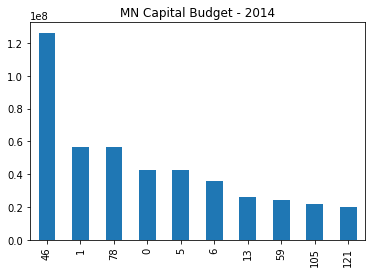

In [32]:
budgetTop10.plot(kind="bar",
                legend=False,
                title="MN Capital Budget - 2014");

# The basic steps to create an Altair chart:
1) create a `Chart` object with a clean DataFrame `alt.chart(df)`

2) choose the appropriate marking `.mark_<markType>()`

3) `encode` the x and y values `.encode(x="", y="")`

In [29]:
alt.Chart(budgetTop10).mark_bar().encode(x="detail",
                                        y="amount")

alt.Chart(...)

In [30]:
alt.Chart(budgetTop10).mark_bar().encode(x="amount",
                                        y="detail")

alt.Chart(...)

## Add details in the `.encode()` part:
Each mark[type] has a number of possible ‘channels’ to encode data with.

In [41]:
alt.Chart(budgetTop10).mark_bar().encode(y="detail",
                                         x="amount",
                                         color="category")

alt.Chart(...)

In [47]:
alt.Chart(budgetTop10).mark_bar().encode(alt.X("amount:Q", title="Amount Spent"),
                                        alt.Y("detail:O", title="Detail"),
                                        color="category")

alt.Chart(...)

In [49]:
data = pd.read_csv("countries.csv")
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [51]:
alt.Chart(data).mark_point().encode(x="population",
                                    y="gdpPerCapita",
                                    color="continent")

alt.Chart(...)

In [59]:
alt.Chart(data).mark_circle().encode(alt.X("population"),
                                    y="gdpPerCapita",
                                    color="country"
                                    ).facet(column="continent")

alt.FacetChart(...)

In [60]:
alt.Chart(data).mark_circle().encode(alt.X("population"),
                                    y="gdpPerCapita",
                                    color="country"
                                    ).facet(column="continent"
                                           ).interactive()

alt.FacetChart(...)

In [61]:
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})

df

,city,month,precip
0,Seattle,Apr,2.68
1,Seattle,Aug,0.87
2,Seattle,Dec,5.31
3,New York,Apr,3.94
4,New York,Aug,4.13
5,New York,Dec,3.58
6,Chicago,Apr,3.62
7,Chicago,Aug,3.98
8,Chicago,Dec,2.56


## Altair has built-in aggregation!!

In [63]:
alt.Chart(df).mark_point().encode(
    x="average(precip)",
    y="city"
)

alt.Chart(...)

In [66]:
chart = alt.Chart(df).mark_point(color="firebrick").encode(
    alt.X("precip",
         scale=alt.Scale(type="log"),
         axis=alt.Axis(title="Log-Scaled Values")),
    alt.Y("city",
         axis=alt.Axis(title="Category"))
)

chart

alt.Chart(...)

In [67]:
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.8.1.json",
  "config": {
    "view": {
      "continuousHeight": 300,
      "continuousWidth": 400
    }
  },
  "data": {
    "name": "data-fdfbb22e8e0e89f6556d8a3b434b0c97"
  },
  "datasets": {
    "data-fdfbb22e8e0e89f6556d8a3b434b0c97": [
      {
        "city": "Seattle",
        "month": "Apr",
        "precip": 2.68
      },
      {
        "city": "Seattle",
        "month": "Aug",
        "precip": 0.87
      },
      {
        "city": "Seattle",
        "month": "Dec",
        "precip": 5.31
      },
      {
        "city": "New York",
        "month": "Apr",
        "precip": 3.94
      },
      {
        "city": "New York",
        "month": "Aug",
        "precip": 4.13
      },
      {
        "city": "New York",
        "month": "Dec",
        "precip": 3.58
      },
      {
        "city": "Chicago",
        "month": "Apr",
        "precip": 3.62
      },
      {
        "city": "Chicago",
        "month": "Aug",
